In [17]:
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
data = pd.read_csv("../house_prices_selection.csv")

In [19]:
stats = data.describe().T[['mean', '50%', 'std']]
stats.rename(columns={'50%': 'median'}, inplace=True)
print(stats)

                        mean         median           std
EVI                 0.380968       0.370041      0.103603
ZoningScore         0.724731       0.795605      0.191092
Price_per_m^2     224.816818     191.302979    131.121509
PDI                 0.392821       0.378316      0.090498
SalePrice      180921.195890  163000.000000  79442.502883
LotFrontage        70.049958      69.000000     24.284752
LotArea         10516.828082    9478.500000   9981.264932
WoodDeckSF         94.244521       0.000000    125.338794
OpenPorchSF        46.660274      25.000000     66.256028
FullBath            1.565068       2.000000      0.550916
GarageCars          1.767123       2.000000      0.747315
GarageArea        472.980137     480.000000    213.804841
OverallQual         6.099315       6.000000      1.382997
YearBuilt        1971.267808    1973.000000     30.202904
YearRemodAdd     1984.865753    1994.000000     20.645407
MasVnrArea        103.685262       0.000000    181.066207
GrLivArea     

In [20]:
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("\nNumărul coloane numerice:", len(numeric_cols))
print("Numărul coloane categorice:", len(categorical_cols))


Numărul coloane numerice: 19
Numărul coloane categorice: 14


In [21]:
data.isnull().sum()

EVI                  292
ZoningScore          292
MSZoning_RL          292
LotConfig_CulDSac    292
LandContour_HLS      292
LotShape_IR2         292
Condition1_Norm      292
MSZoning_FV          292
Condition1_Feedr     292
LotShape_Reg         292
MSZoning_RM          292
Price_per_m^2        292
PDI                  292
SalePrice              0
LotFrontage          259
LotArea                0
WoodDeckSF             0
OpenPorchSF            0
FullBath               0
GarageCars             0
GarageArea             0
KitchenQual            0
PavedDrive             0
OverallQual            0
YearBuilt              0
YearRemodAdd           0
MasVnrArea             8
GrLivArea              0
TotalBsmtSF            0
1stFlrSF               0
BsmtQual              37
CentralAir             0
Foundation             0
dtype: int64

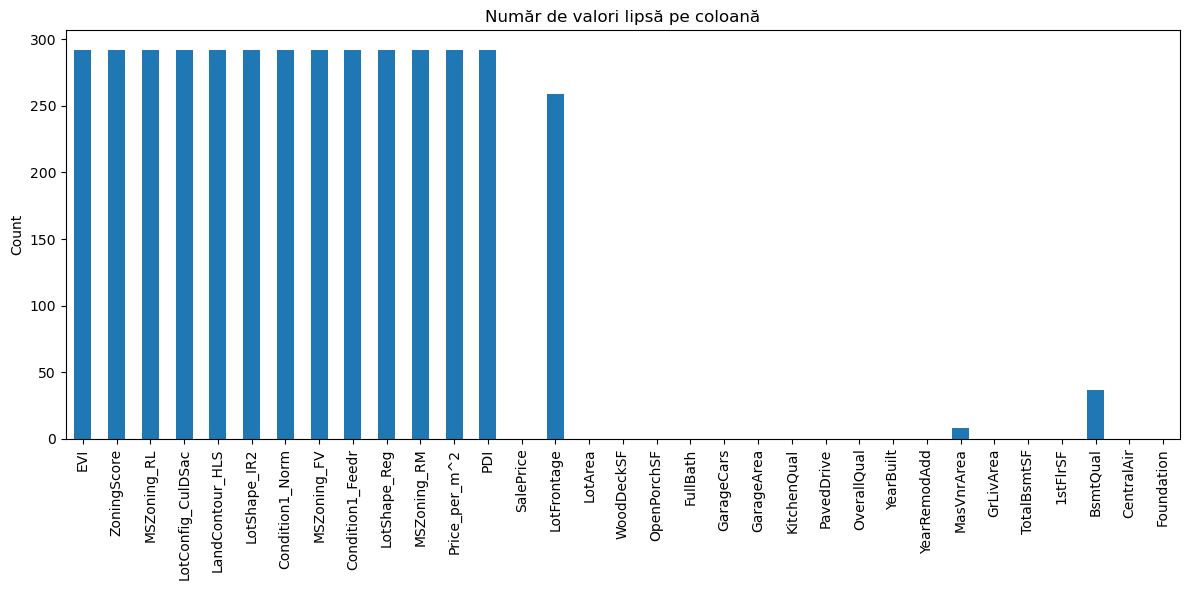

In [22]:
plt.figure(figsize=(12, 6))
data.isnull().sum().plot(kind='bar')
plt.title("Număr de valori lipsă pe coloană")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [23]:
if "SalePrice" in numeric_cols:
    pearson_corr = data[numeric_cols].corr()['SalePrice'].sort_values(ascending=False)
    print("\nCorelația Pearson cu SalePrice:\n")
    print(pearson_corr)
else:
    print("\n'SalePrice' nu este o coloană numerică sau nu există.")


Corelația Pearson cu SalePrice:

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
LotFrontage      0.351799
WoodDeckSF       0.324413
OpenPorchSF      0.315856
LotArea          0.263843
PDI             -0.000689
ZoningScore     -0.010706
EVI             -0.023379
Price_per_m^2   -0.034173
Name: SalePrice, dtype: float64


    The missing values plot show that several columns (EVI, ZoningScore, PDI, Price_per_m^2) and some zoning or condition categories have almost all values missing, meaning they are not useful in their current form. LotFrontage also has many missing values, while BsmtQual and MasVnrArea have only a moderate number. 
    
    Most important numerical features, like overall quality, living area, garage size, and basement size, have no missing data. 
    
    The Pearson correlations show that SalePrice is most strongly related to OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, and 1stFlrSF, which means that house quality and size are the main drivers of price. Features such as EVI, ZoningScore, PDI, and Price_per_m^2 have almost no correlation with price and are not likely to be useful predictors.